**Executive summary**

Repeat customers represent 3% of the customer base but generate 5.6% of total revenue. Despite placing smaller orders than one-time buyers (repeat customer AOV is consistently below general AOV), their higher purchase frequency drives greater total revenue per customer. This explains why most customers with the highest historical LTV are single-transaction customers—high value is driven by large one-time purchases rather than repeat business.

The data indicates that repeat purchasing behavior is currently rare. Increasing repeat rates represents a significant opportunity. Strategies to convert one-time high-value buyers into repeat customers—such as post-purchase engagement, loyalty programs, or personalized recommendations—could meaningfully increase overall revenue without requiring additional customer acquisition spend.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

We start the analysis by observing the repeat customer rate, meaning the fraction of customers with two or more delivered orders

In [9]:
# Define the relative path to the directory containing derived datasets
# Using a variable makes it easier to change paths consistently across the notebook
path = './../data/derived/'

# Load the data from CSV into a pandas DataFrame
df1 = pd.read_csv(path + 'repeat_customer_rate.csv')

print(df1)

   repeat_customers  total_customers  repeat_rate
0              2801            93358         0.03


Only 3% of customers have two or more delivered orders. However, this figure on its own is meaningless. We must do further analysis to determine the impact of repeat customer compared to single-time customers.

In [10]:
df2 = pd.read_csv(path + 'repeat_revenue_share.csv')
print(df2)

   repeat_revenue  total_revenue  repeat_revenue_share
0       864357.21    15422461.77              0.056045


Repeat customer represent 5.6% of the total revenue despite being 3% of the customer base, indicating higher average spend among returning buyers. Now we analyze customer historical lifetime value (LTV), defined as the revenue a custoemr has generated from their first purchase to the present. WE 

In [11]:
df3 = pd.read_csv(path + 'customer_LTV.csv')
print(df3.head(10))

                 customer_unique_id  customer_ltv  total_orders
0  0a0a92112bd4c708ca5fde585afaa872      13664.08             1
1  da122df9eeddfedc1dc1f5349a1a690c       7571.63             2
2  763c8b1c9c68a0229c42c9fc6f662b93       7274.88             1
3  dc4802a71eae9be1dd28f5d788ceb526       6929.31             1
4  459bef486812aa25204be022145caa62       6922.21             1
5  ff4159b92c40ebe40454e3e6a7c35ed6       6726.66             1
6  4007669dec559734d6f53e029e360987       6081.54             1
7  eebb5dda148d3893cdaf5b5ca3040ccb       4764.34             1
8  48e1ac109decbb87765a3eade6854098       4681.78             1
9  c8460e4251689ba205045f3ea17884a1       4655.91             4


Eight out of the ten customer with the highest LTV have are single-time customer, which suggest that repeat customer are not as important as initially thought, in contradiction with the previous results. To solve this contradiction, we analyze the monthly average order value (AOV) of repeat customer in comparison to the general AOV.

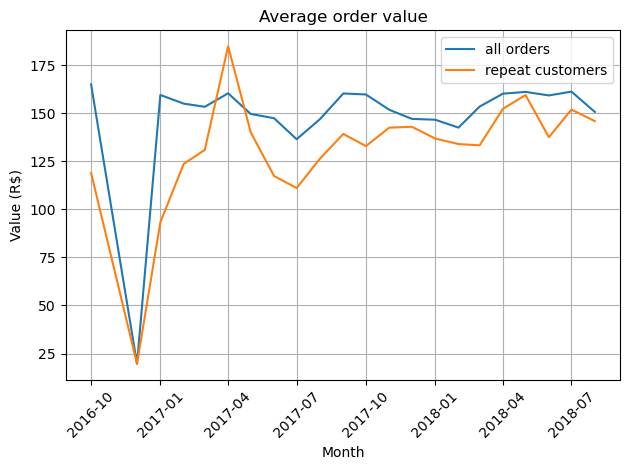

In [15]:
df4 = pd.read_csv(path + 'monthly_AOV.csv')
df5 = pd.read_csv(path + 'monthly_repeat_AOV.csv')

df4['date'] = pd.to_datetime(
    dict(year=df4.year, month=df4.month, day=1))
df5['date'] = pd.to_datetime(
    dict(year=df5.year, month=df5.month, day=1))


# Plot monthly revenue over time
# Revenue is scaled to millions of Brazilian reais for readability
plt.plot(df4['date'], df4['monthly_average_order_value'], label = 'all orders')
plt.plot(df5['date'], df5['repeat_AOV'], label = 'repeat customers')


# Adjusts graph for readibility
plt.grid()
plt.xlabel('Month')
plt.ylabel('Value (R$)')
plt.title('Average order value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In both cases, AOV remains relatively constant, except for December 2017 which was previously identified as an outlier caused by poor early-platform adoption. In almost all months, general AOV exceeds repeat customer AOV, indicating that repeat customers place smaller orders on average than one-time buyers. This explains why most customers with the highest historical LTV are single-transaction customers. However, repeat customers order more frequently, resulting in higher total revenue per customer. This is why they represent 5.6% of total revenue despite comprising only 3% of the customer base.